# Zadanie

W celu oszacowania dokładności pomiarów wykonanych pewnym przyrządem dokonano $8$ pomiarów pewnej wielkości i otrzymano: 

$18.17, 18.21, 18.05, 18.14, 18.19, 18.22, 18.06, 18.08$. 

Zweryfikować na poziomie istotności $\alpha = 0.05$ hipotezę $\sigma^2=0.06$ wobec hipotez alternatywnych:

<ul>
<li> $\sigma^2 \neq 0.06$ </li>
<li> $\sigma^2 < 0.06$ </li>
<li> $\sigma^2 > 0.06$ </li>
</ul>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import integrate

## Model 1.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$). 

Weryfikujemy hipotezę:

$$
H_{0}: \sigma^2 = \sigma^2_0
$$

$$
H_{1}: \sigma = \sigma_1 > \sigma_0
$$

W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
[\chi^2(1-\alpha,n-1), +\infty)
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$



## Model 2.

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

$$
H_{1}: \sigma = \sigma_1 < \sigma_0
$$

W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(0, \chi^2(\alpha,n-1)]
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$


## Model 3

Badana cecha $X$ populacji generalnej ma rozkład $N(\mu,\sigma)$ przy <b>obu parametrach nieznanych</b> ($n<50$).

Weryfikujemy hipotezę:

$$
H_{0}: \sigma = \sigma_0
$$

$$
H_{1}: \sigma = \sigma_1 \neq \sigma_0
$$


W tym teście używa się statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

Zbiór krytyczny jest dany za pomocą przedziału

$$
(0, \chi^2(\frac{1}{2}\alpha,n-1)] \cup [\chi^2(1-\frac{1}{2}\alpha,n-1), +\infty)
$$

gdzie $\chi^2(\alpha,n)$ jest kwantylem rozkładu $\chi^2$ przy $n$ stopniach swobody oraz

$
S^2 = \frac{1}{n} \sum_{i=1}^{n} (X_{i} - \bar X)^2.
$


In [3]:
data=np.array([18.17, 18.21, 18.05, 18.14, 18.19, 18.22, 18.06, 18.08])
n=data.size

## Zdefiniujmy zmienną losową o rozkładzie chi-kwadrat

In [4]:
X=stats.chi2(n-1)

## Wyliczmy wartość statystyki

$$
\chi^2=\frac{n S^2}{\sigma_0^2} 
$$

In [5]:
alpha=0.05
bar_x = np.mean(data)
s = np.std(data,ddof=0)
sigma_2=0.06
chi= (n*s**2)/sigma_2
print(bar_x)
print(sigma_2)
print(s)
print(s*s)
print(chi)

18.14
0.06
0.0640312423743
0.0041
0.546666666667


# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2\neq0.06$

## Wypisz przedział krytyczny


In [7]:
L1=0
L2=X.ppf(alpha/2)
R1=
R2=np.inf

In [8]:
print(r'( %3.3f , %3.3f) sum ( %3.3f , %3.3f)' % (L1,L2,R1,R2))

( 0.000 , 1.690) sum ( 16.013 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [ ]:
if (chi <L2) | (chi > R1):
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

## wylicz p-value

In [9]:
p = 2*X.cdf(chi)
print(p)

0.00148593511979


## zweryfikuj hipotezę na podstawie wartości p-value

In [10]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Odrzucam hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

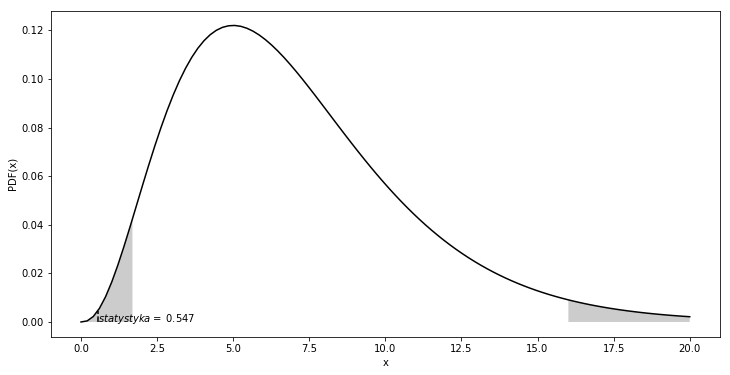

# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2>0.06$
## Wypisz przedział krytyczny

In [12]:
L=X.ppf(1-alpha)
R=np.inf
print(r'( %3.2f , %3.2f)' % (L,R))

( 14.07 , inf)


## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

In [23]:
if chi > L:
    print("Wartość statystyki należy do przedziału krytycznego więc odrzucamy hipotezę H_0")
else:
    print("Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0")

Wartość statystyki nie należy do przedziału krytycznego więc nie ma podstaw by odrzucić hipotezę H_0


## wylicz p-value

In [24]:
p = X.sf(chi)
print(p)

0.99925703244


## zweryfikuj hipotezę na podstawie wartości p-value

In [25]:
if(p < alpha):
    print("Odrzucam hipotezę zerową H_0")
else:        
    print("Nie ma podstaw by odrzucić hipotezę zerową H_0")

Nie ma podstaw by odrzucić hipotezę zerową H_0


Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>

# $H_0$: $\sigma^2=0.06$ przy hipotezie alternatywnej $H_1$: $\sigma^2<0.06$

## Wypisz przedział krytyczny

## zweryfikuj hipotezę na podstawie wartości statystyki oraz przedziału krytycznego

## wylicz p-value

## zweryfikuj hipotezę na podstawie wartości p-value

Narysuj gęstość rozkładu statystyki i zaznacz na nim:
<ul>
<li> przedział krytyczny </li>
<li> wartość statystyki testowej </li>
<li> p-value </li>
</ul>